# Bitcoin Stock price Prediction using LSTM

![](https://media0.giphy.com/media/f67U9Xc53i4ViUs5T2/giphy.gif?cid=ecf05e47h4dpv8s5ppc6omcbb5uzwprey8y97x3fy8qk8dk8&rid=giphy.gif&ct=g) 

# [](http://) Table of Content 
<hr style='height:2px'>

## 1. What is LSTM?
## 2. Importing Library
## 3. Loading Dataset
## 4. EDA
## 5. Biulding Model
## 6. Prediction
## 7. Evaluation 
## 8. Conclusion
<hr style='height:2px'>

# 1. What is LSTM ?

* ###  Long short-term memory is an artificial recurrent neural network architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can process not only single data points, but also entire sequences of data.

* ### Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems. This is a behavior required in complex problem domains like machine translation, speech recognition, and more. LSTMs are a complex area of deep learning.

* ### LSTMs are often referred to as fancy RNNs. Vanilla RNNs do not have a cell state. They only have hidden states and those hidden states serve as the memory for RNNs. Meanwhile, LSTM has both cell states and a hidden states.

![image](https://blog.floydhub.com/content/images/2019/06/Slide19.JPG)

# 2. Importing Library

In [ ]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# 3. Loading Dataset

#  [We can use this link to download bitcoin dataset from yahoo finance](https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD)

In [ ]:
# Load our dataset 
# Note it should be in same dir


maindf=pd.read_csv('/content/sample_data/Bitstamp_BTCUSD_1h.csv')

In [ ]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  35347
Total number of fields present in the dataset:  9


In [ ]:
maindf.shape

(35347, 9)

In [ ]:
maindf.head()

unix             date   symbol     open     high      low    close  \
0  1526364000   5/15/2018 6:00  BTC/USD  8733.86  8796.68  8707.28  8740.99   
1  1526367600   5/15/2018 7:00  BTC/USD  8740.99  8766.00  8721.11  8739.00   
2  1526371200   5/15/2018 8:00  BTC/USD  8739.00  8750.27  8660.53  8728.49   
3  1526374800   5/15/2018 9:00  BTC/USD  8728.49  8754.40  8701.35  8708.32   
4  1526378400  5/15/2018 10:00  BTC/USD  8708.32  8865.00  8695.11  8795.90   

    Volume BTC  Volume USD  
0   4906603.14      559.93  
1   2390398.89      273.58  
2   7986062.84      917.79  
3   1593991.98      182.62  
4  11101273.74     1260.69

In [ ]:
maindf.tail()

unix             date   symbol      open      high       low  \
35342  1653595200  5/26/2022 20:00  BTC/USD  29353.13  29566.00  29248.48   
35343  1653598800  5/26/2022 21:00  BTC/USD  29440.81  29656.96  29423.83   
35344  1653602400  5/26/2022 22:00  BTC/USD  29551.58  29633.39  29464.05   
35345  1653606000  5/26/2022 23:00  BTC/USD  29470.89  29529.56  29158.39   
35346  1653609600   5/27/2022 0:00  BTC/USD  29183.39  29291.15  29117.85   

          close  Volume BTC    Volume USD  
35342  29443.54   35.025122  1.031264e+06  
35343  29557.12   38.962196  1.151610e+06  
35344  29486.00   37.022848  1.091656e+06  
35345  29183.06   48.991384  1.429718e+06  
35346  29267.22    6.510075  1.905318e+05

In [ ]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35347 entries, 0 to 35346
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        35347 non-null  int64  
 1   date        35347 non-null  object 
 2   symbol      35347 non-null  object 
 3   open        35347 non-null  float64
 4   high        35347 non-null  float64
 5   low         35347 non-null  float64
 6   close       35347 non-null  float64
 7   Volume BTC  35347 non-null  float64
 8   Volume USD  35347 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.4+ MB


In [ ]:
maindf.describe()

unix          open          high           low         close  \
count  3.534700e+04  35347.000000  35347.000000  35347.000000  35347.000000   
mean   1.589987e+09  21230.604344  21347.530078  21104.426272  21231.320044   
std    3.673420e+07  18564.954783  18671.160763  18449.937135  18565.061508   
min    1.526364e+09   3139.760000   3158.340000   3122.280000   3139.760000   
25%    1.558175e+09   7180.955000   7209.995000   7153.670000   7180.955000   
50%    1.589987e+09  10154.460000  10200.000000  10108.660000  10154.660000   
75%    1.621798e+09  38641.810000  38871.830000  38403.360000  38648.010000   
max    1.653610e+09  68635.050000  69000.000000  68447.000000  68627.010000   

         Volume BTC    Volume USD  
count  3.534700e+04  3.534700e+04  
mean   1.517140e+06  2.992269e+06  
std    3.033213e+06  7.197552e+06  
min    0.000000e+00  0.000000e+00  
25%    1.487856e+02  1.789800e+02  
50%    4.812897e+05  6.574700e+02  
75%    1.797198e+06  3.232908e+06  
max    6.857061e+07  2.582324e+08

# Checking for Null Values

In [ ]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [ ]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [ ]:
# If dataset had null values we can use this code to drop all the null values present in the dataset

# maindf=maindf.dropna()
# print('Null Values:',maindf.isnull().values.sum())
# print('NA values:',maindf.isnull().values.any())

In [ ]:
# Final shape of the dataset after dealing with null values 

maindf.shape

(2737, 9)

# 4. EDA(Exploratory Data Analysis)

In [ ]:
# Printing the start date and End date of the dataset

sd=maindf.iloc[0][1]
ed=maindf.iloc[-1][1]


print('Starting Date',sd)
print('Ending Date',ed)


Starting Date 5/15/2018 6:00
Ending Date 5/27/2022 0:00


# 5. Building LSTM Model

* ## First Step is Preparing Data for Training and Testing

* ## Here we are just considering 1 year data for training data 

* ## Since Bitcoin price has drastically flucated from 200 dollar in year 2014 to 15000 dollar in year 2018 to 3000 dollar in year 2019(theses values are apporx) so we will just consider 1 Year to avoid this type of flucation in the data.

* ## As we want to predict Close Price of the Bitcoin so we are just Considering Close aand Date  

In [ ]:
# Lets First Take all the Close Price 
closedf = maindf[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (35347, 2)


In [ ]:
fig = px.line(closedf, x=closedf.date, y=closedf.close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2018-2022', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Now we will Take data of just 1 Year

In [ ]:

close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  35347


In [ ]:
closedf

date     close
0       5/15/2018 6:00   8740.99
1       5/15/2018 7:00   8739.00
2       5/15/2018 8:00   8728.49
3       5/15/2018 9:00   8708.32
4      5/15/2018 10:00   8795.90
...                ...       ...
35342  5/26/2022 20:00  29443.54
35343  5/26/2022 21:00  29557.12
35344  5/26/2022 22:00  29486.00
35345  5/26/2022 23:00  29183.06
35346   5/27/2022 0:00  29267.22

[35347 rows x 2 columns]

* ### Normalizing Data
- Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
- MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [ ]:
# deleting date column and normalizing using MinMax Scaler

del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(35347, 1)


* ### Slicing data into Training set and Testing set

In [ ]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.9)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (31812, 1)
test_data:  (3535, 1)


* ### Now we Transform the Close price based on Time-series-analysis forecasting requirement , Here we will take 15   

In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (31796, 15)
y_train:  (31796,)
X_test:  (3519, 15)
y_test (3519,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (31796, 15, 1)
X_test:  (3519, 15, 1)


* # Actuall Model Building

In [ ]:
model=Sequential()
model.add(LSTM(50, input_shape=(None,1), activation="relu"))

model.add(Dense(1))
#model.add(LSTM(10,input_shape=(None,1),activation="relu"))

#model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
994/994 [==============================] - 8s 7ms/step - loss: 0.0021 - val_loss: 6.9056e-05
Epoch 2/200
994/994 [==============================] - 7s 7ms/step - loss: 5.1198e-05 - val_loss: 6.0502e-05
Epoch 3/200
994/994 [==============================] - 7s 7ms/step - loss: 4.8295e-05 - val_loss: 5.2615e-05
Epoch 4/200
994/994 [==============================] - 8s 9ms/step - loss: 4.2281e-05 - val_loss: 4.7190e-05
Epoch 5/200
994/994 [==============================] - 7s 7ms/step - loss: 3.7130e-05 - val_loss: 4.1461e-05
Epoch 6/200
994/994 [==============================] - 7s 7ms/step - loss: 3.1315e-05 - val_loss: 5.6636e-05
Epoch 7/200
994/994 [==============================] - 7s 7ms/step - loss: 2.8161e-05 - val_loss: 3.4515e-05
Epoch 8/200
994/994 [==============================] - 7s 7ms/step - loss: 2.5741e-05 - val_loss: 3.0166e-05
Epoch 9/200
994/994 [==============================] - 7s 7ms/step - loss: 2.4553e-05 - val_loss: 3.8251e-05
Epoch 10/200
994/994 [=

- ### Plotting Loss vs Validation loss 

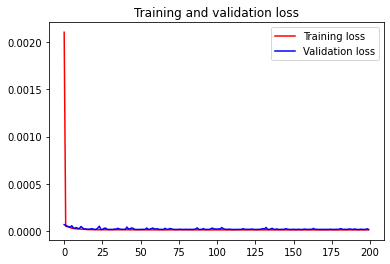

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

((31796, 1), (3519, 1))

- # Model Evaluation

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

- ## Evaluation metrices RMSE, MSE and MAE

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  225.94157860446882
Train data MSE:  51049.596942279364
Train data MAE:  107.31699283555224
-------------------------------------------------------------------------------------
Test data RMSE:  276.94984701840167
Test data MSE:  76701.21776351608
Test data MAE:  186.54081546160126


- ## Variance Regression Score

In [ ]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9998490099632007
Test data explained variance regression score: 0.996521021428824


- ## R square score for regression

In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9998489984844464
Test data R2 score: 0.996505616976433


- ## Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  7.105830708301559e-05
Test data MGD:  5.40854225339464e-05
----------------------------------------------------------------------
Train data MPD:  1.4175119717125415
Test data MPD:  2.015755279313522


- # Comparision of original stock close price and predicted close price

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (35347, 1)
Test predicted data:  (35347, 1)


- # Predicting next 30 days

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 72
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  72


- # Plotting last 15 days of dataset and next predicted 30 days

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 48 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 48 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()



In [ ]:
!pip install pyyaml h5py 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model.save('my_model.h5') 

- # Plotting entire Closing Stock Price with next 30 days period of prediction

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing BTC price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='red',legend_title_text='BTC')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Thats it we are Done with Bitcoin Price Prediction using LSTM.

In [ ]:
!git clone https://github.com/bukosabino/btctrading.git
!cd btctrading
!virtualenv -p python3 virtualenvironment
!source virtualenvironment/bin/activate
!pip install -r requirements.txt

Cloning into 'btctrading'...
remote: Enumerating objects: 165, done.
remote: Total 165 (delta 0), reused 0 (delta 0), pack-reused 165
Receiving objects: 100% (165/165), 11.75 MiB | 15.42 MiB/s, done.
Resolving deltas: 100% (87/87), done.
/bin/bash: virtualenv: command not found
/bin/bash: virtualenvironment/bin/activate: No such file or directory
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
!pip install -r /content/btctrading/requirements.txt

     |████████████████████████████████| 13.4 MB 5.3 MB/s 
     |████████████████████████████████| 53.2 MB 69 kB/s 
     |████████████████████████████████| 4.8 MB 35.7 MB/s 
     |████████████████████████████████| 9.2 MB 27.9 MB/s 
     |████████████████████████████████| 77 kB 5.4 MB/s 
     |████████████████████████████████| 8.9 MB 37.9 MB/s 
     |████████████████████████████████| 15.3 MB 34.5 MB/s 
     |████████████████████████████████| 158 kB 42.8 MB/s 
     |████████████████████████████████| 194 kB 56.1 MB/s 
     |████████████████████████████████| 484 kB 38.8 MB/s 
     |████████████████████████████████| 88 kB 7.2 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 132 kB 47.8 MB/s 
  Created wheel for matplotlib: filename=matplotlib-2.0.0-cp37-cp37m-linux_x86_64.whl size=10702909 sha256=6755db5344d45dacbb667c5f1e994538bb2d4b9853bdf2acbee9fa4cb596c308
  Stored in directory: /root/.cache/pip/wheels/4c/b4/87/9b99b67a71111498af7c91a7

In [ ]:
!pip3 install virtualenv
!virtualenv theanoEnv

     |████████████████████████████████| 8.8 MB 5.3 MB/s 
     |████████████████████████████████| 461 kB 34.6 MB/s 
created virtual environment CPython3.7.13.final.0-64 in 1607ms
  creator CPython3Posix(dest=/content/theanoEnv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==22.0.4, setuptools==62.1.0, wheel==0.37.1
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [ ]:
!source /content/theanoEnv/bin/activate; pip3 install theano

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 30.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 9.5 MB/s eta 0:00:00
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668111 sha256=248bb0e2f0dab917db394bffa871220fd3c6bb8abc9bc5d0320ce3188187931a
  Stored in directory: /root/.cache/pip/wheels/26/68/6f/745330367ce7822fe0cd863712858151f5723a0a5e322cc144
Successfully built theano


In [ ]:
!python3 /content/btctrading/get_data.py

Loading.....
Traceback (most recent call last):
  File "/content/btctrading/get_data.py", line 70, in <module>
    get('data/datas-Hourly.csv', period=settings.PERIOD, market=settings.MARKET)
  File "/content/btctrading/get_data.py", line 21, in get
    with open(path_file, 'w') as f:
FileNotFoundError: [Errno 2] No such file or directory: 'data/datas-Hourly.csv'


In [ ]:
!git clone https://github.com/jra333/BTC-Price-Prediction.git

Cloning into 'BTC-Price-Prediction'...
remote: Enumerating objects: 162, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 162 (delta 7), reused 2 (delta 2), pack-reused 154
Receiving objects: 100% (162/162), 37.22 MiB | 19.46 MiB/s, done.
Resolving deltas: 100% (49/49), done.
